TESLA FINANCIAL FORECAST ANALYSIS - OPTIMISTIC SCENARIO
Project root: F:\tesla-optimus-business-analysis\notebooks
Could not find Tesla_Financial_Forecast_Optimistic.xlsx. Creating sample data for demonstration...

Creating sample data structure for optimistic forecast...

Sample data shape: (9, 22)

Sample data preview:
    Year  Total_Revenue  Net_Income  Gross_Profit  Total_Assets  Total_Equity  \
0   2022       81462.00    12587.00      20853.00     106618.00      62634.00   
1   2023       96773.00    14974.00      17660.00     106618.00      62634.00   
2   2024       97690.00     7153.00      17450.00     122070.00      72913.00   
3  2025E      123883.75    19036.91      30945.29      73896.66      39456.97   
4  2026E      141855.95    22380.43      35956.65      84617.07      45181.12   

       Cash  Operating_Cash_Flow  Net_Cash_Flow  Gross_Margin  ...       ROA  \
0       NaN             14724.00       -1220.00      0.255984  ...  0.140445   
1  16398.00             13256.

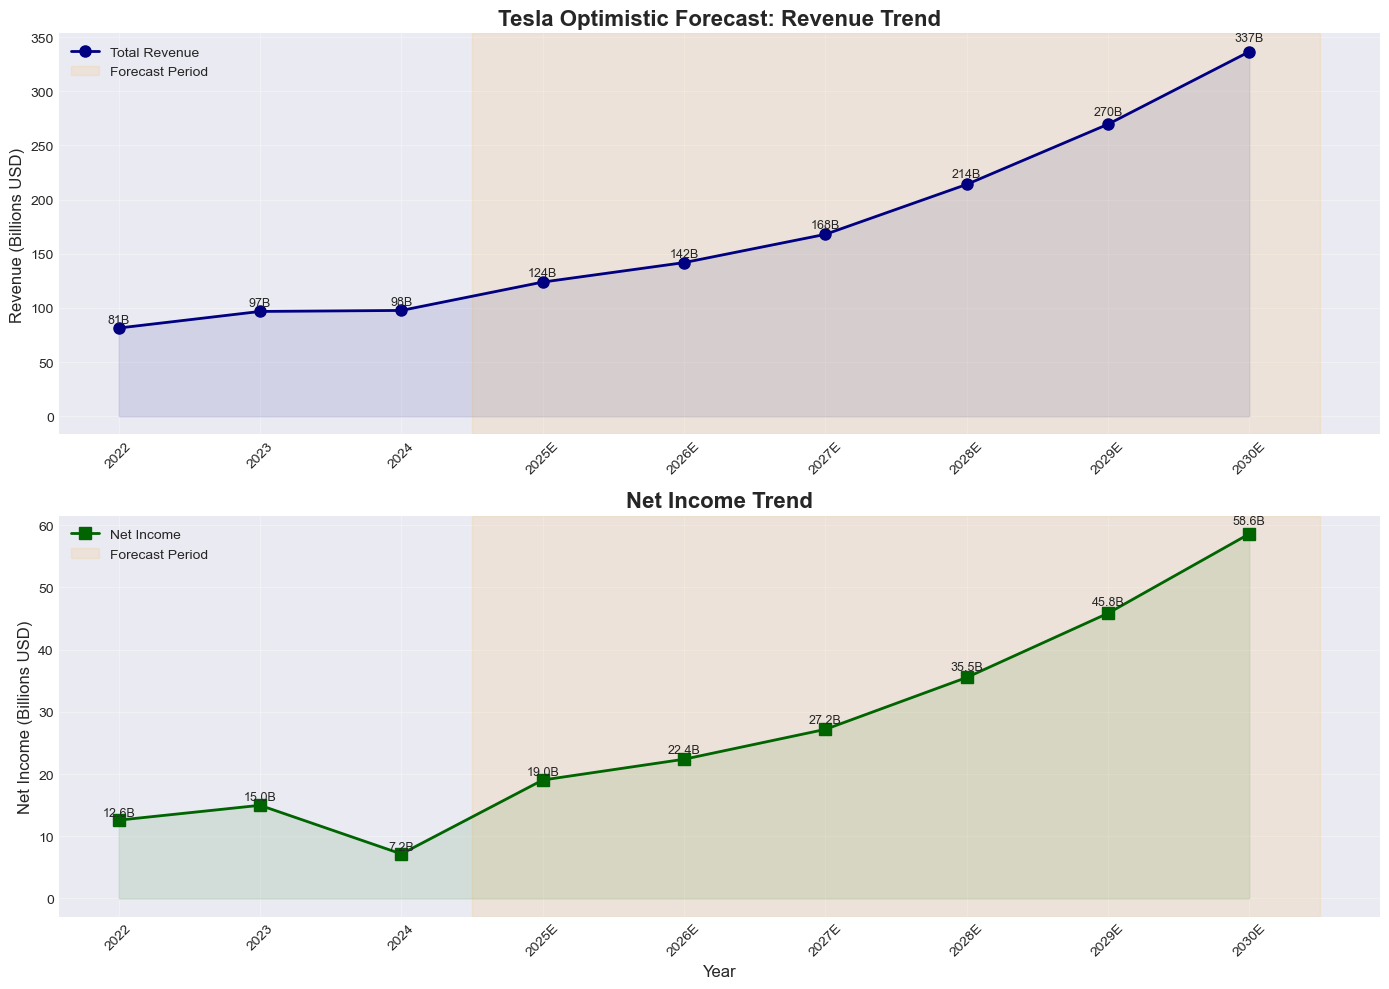


2. Creating Profitability Ratios Chart...


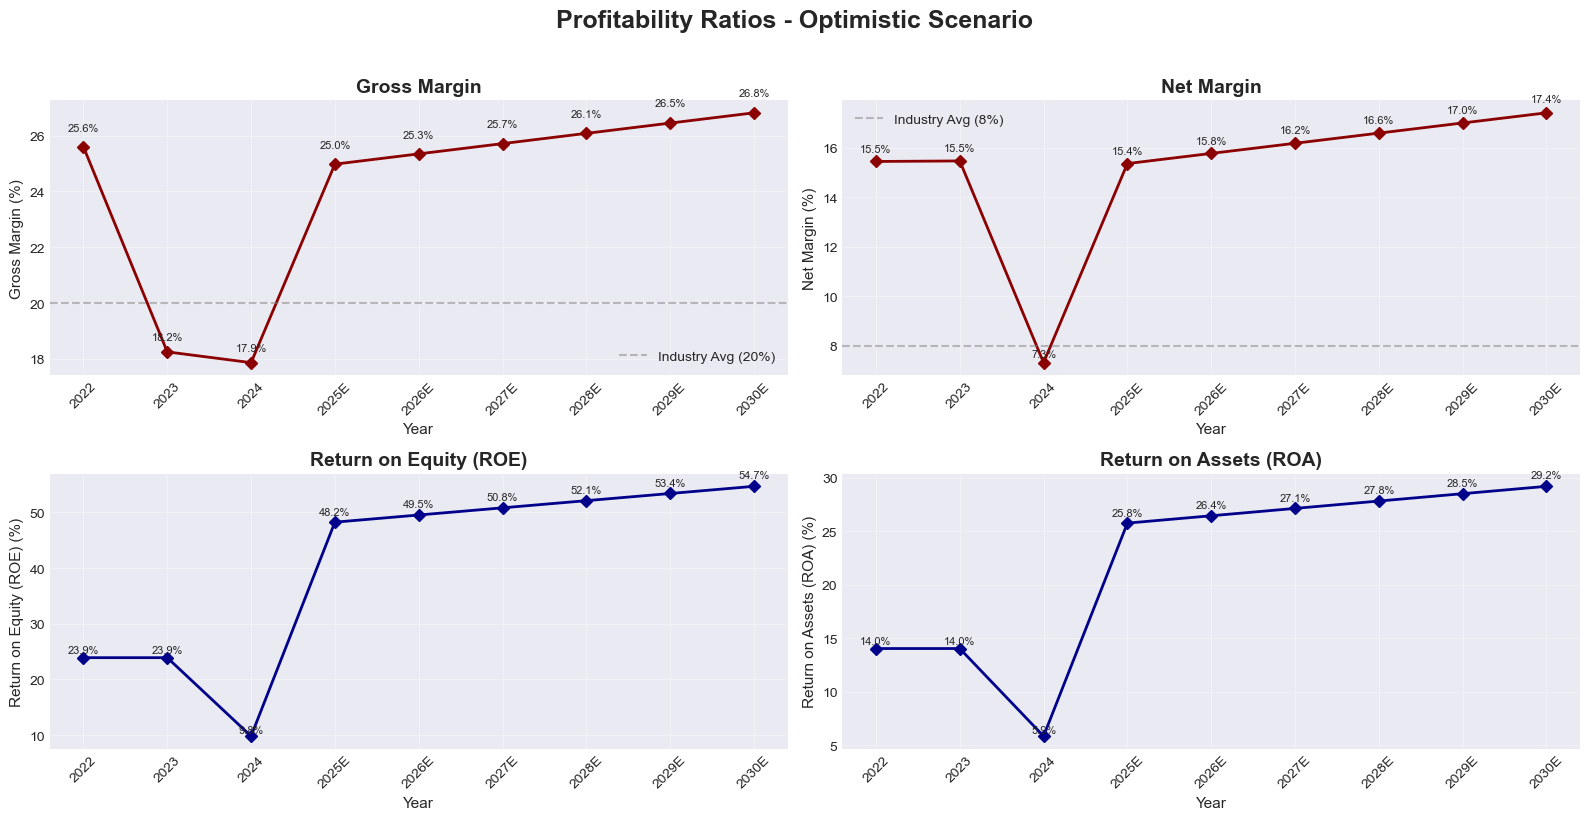


3. Creating Balance Sheet Analysis Chart...


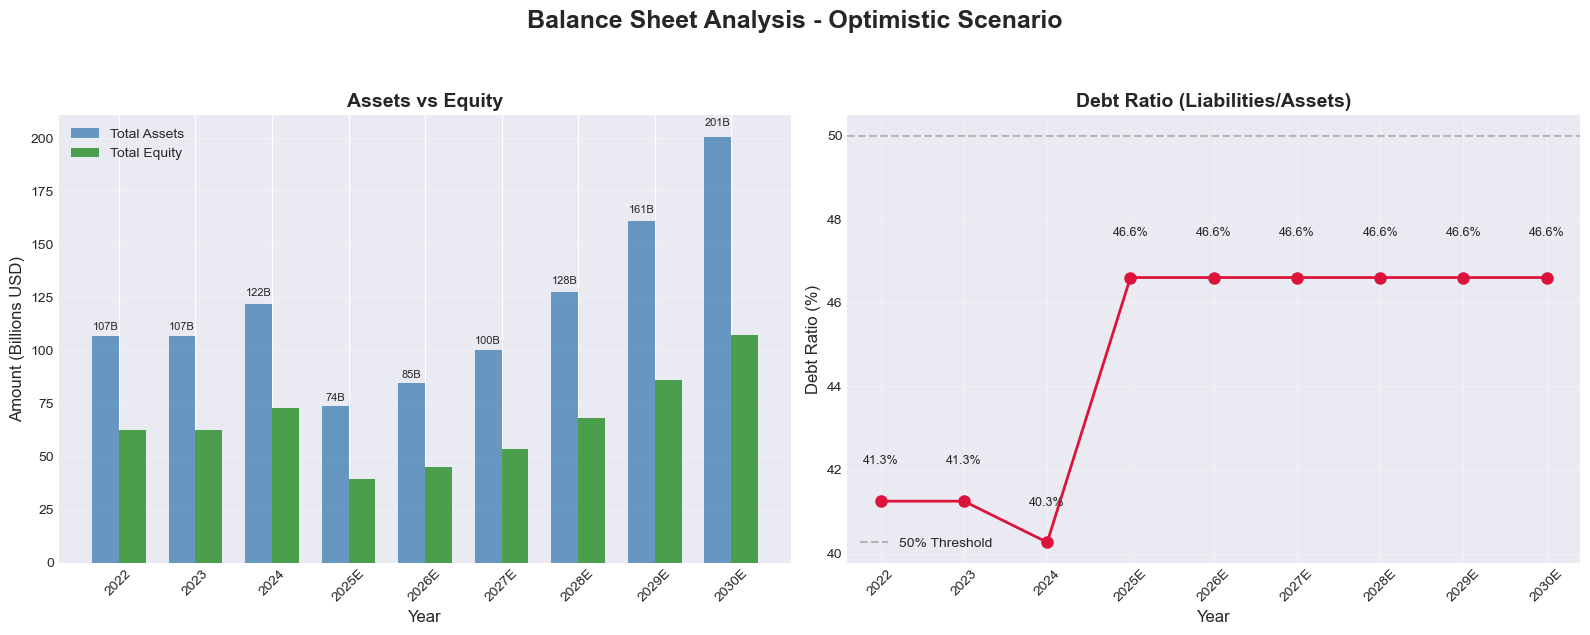


4. Creating Cash Flow Analysis Chart...


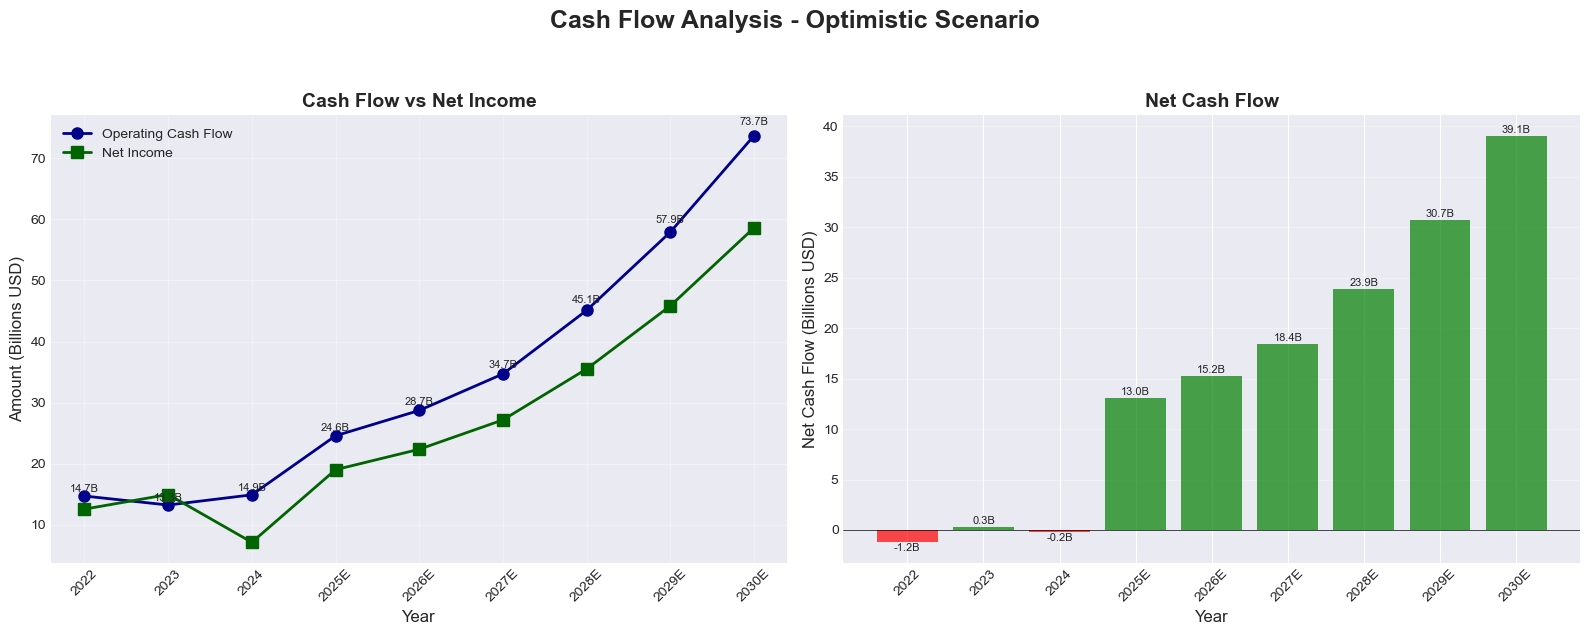


5. Creating Asset Efficiency Chart...


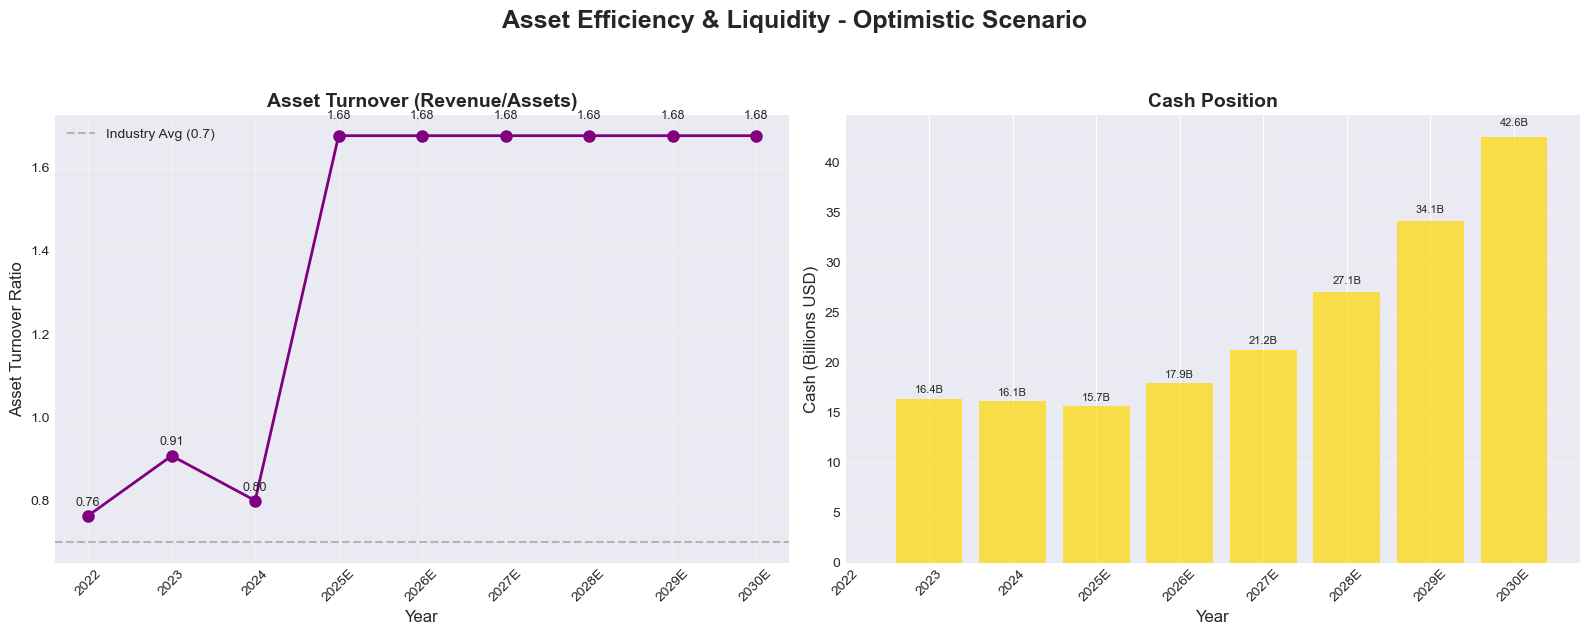


6. Creating Growth Projections Chart...


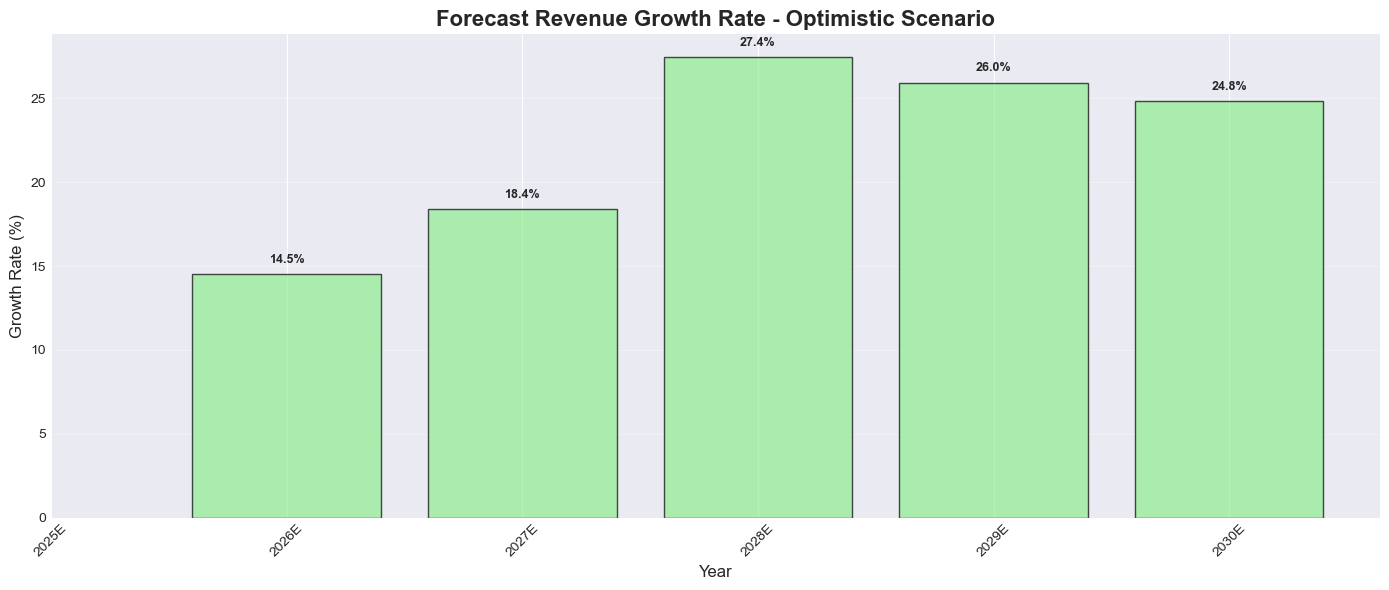


7. Creating Margin Analysis Chart...


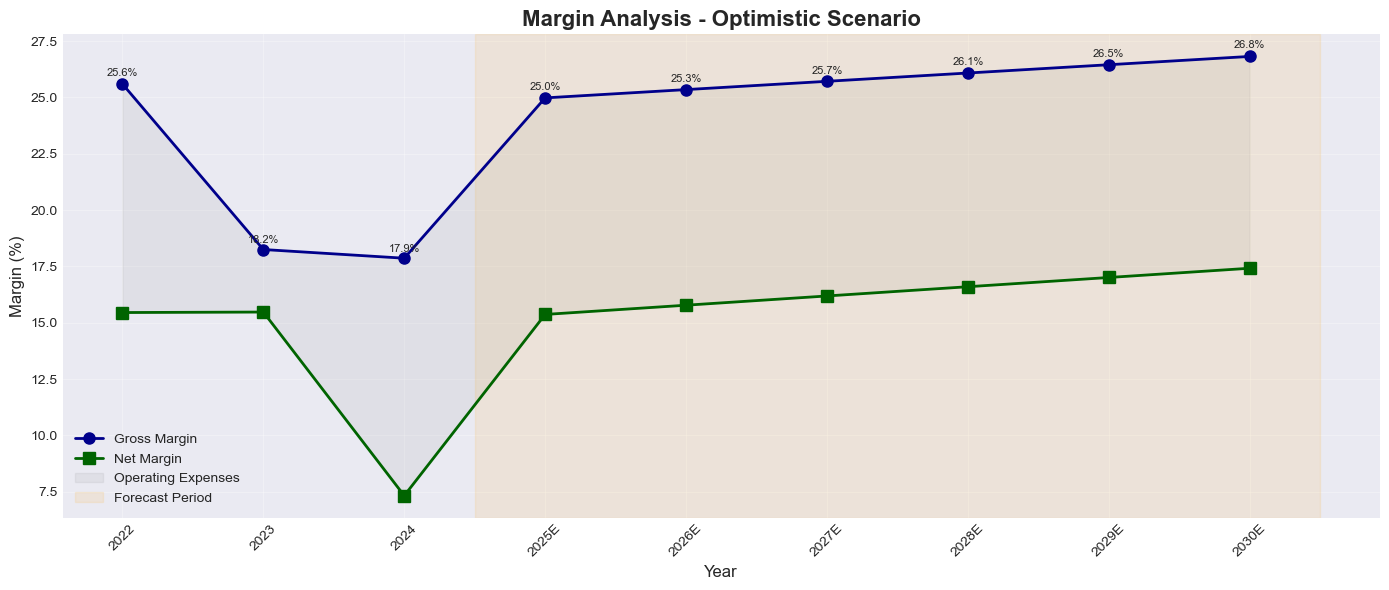


8. Creating Financial Health Dashboard...


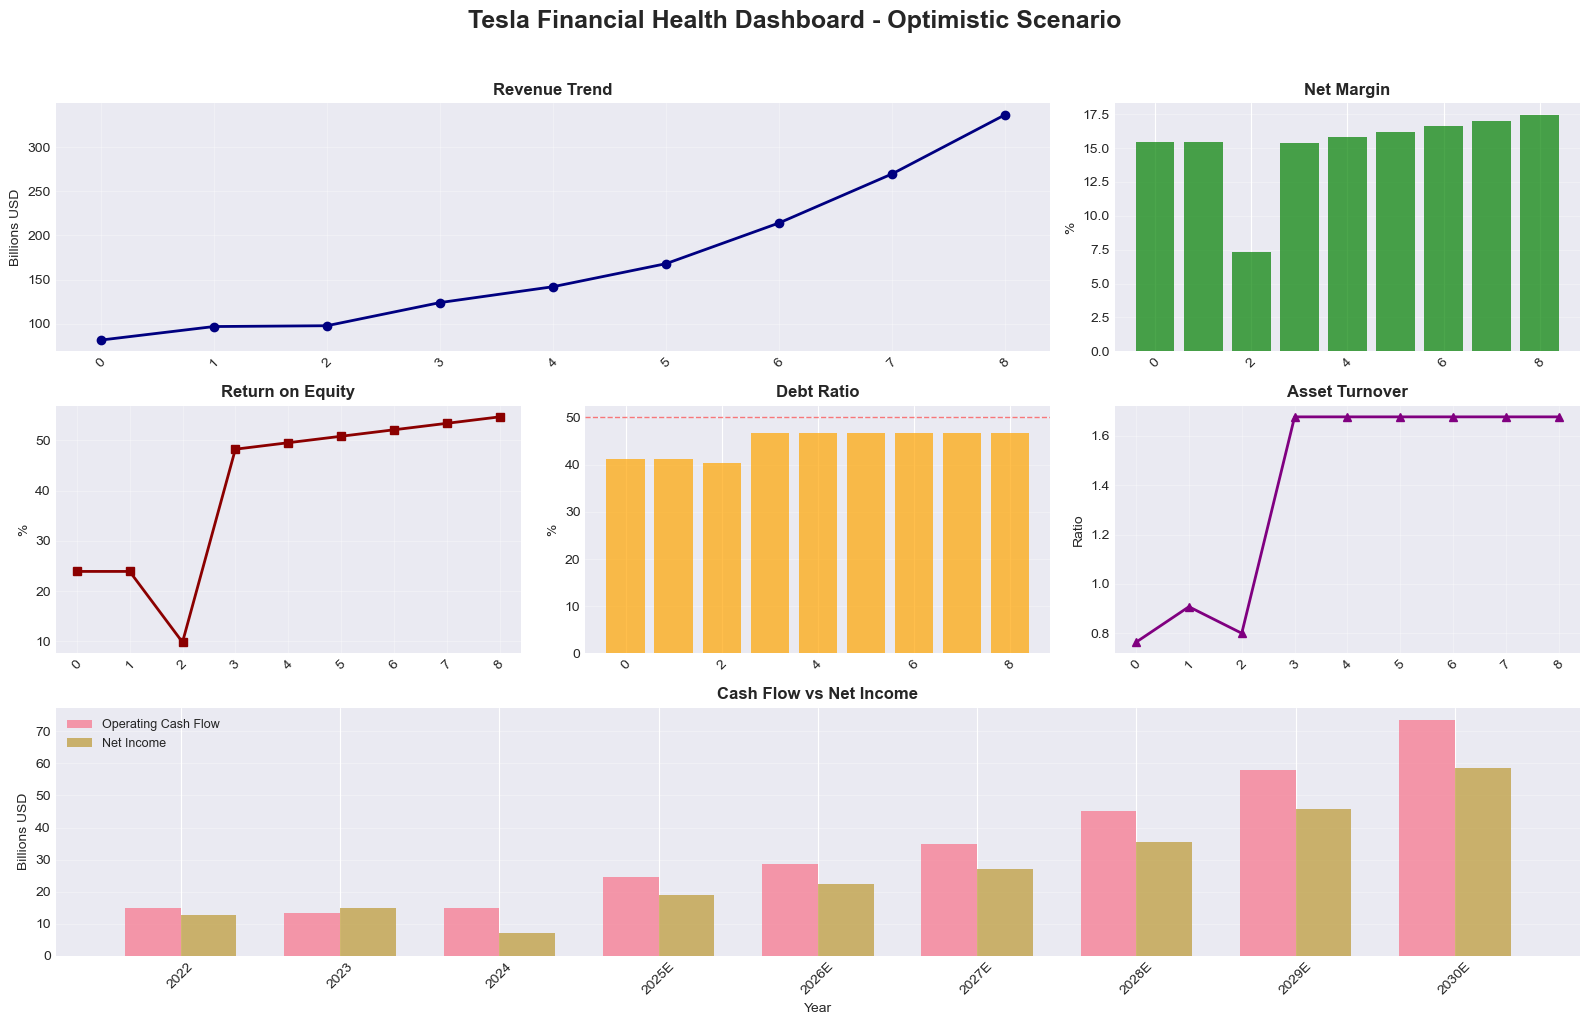


FINANCIAL ANALYSIS SUMMARY

--- Historical Performance (2022-2024) ---
  Avg Revenue: $92.0B
  Last Revenue: $97.7B
  Avg Net Income: $11.6B
  Last Net Income: $7.2B
  Avg Net Margin: 12.7%
  Last Net Margin: 7.3%
  Avg ROE: 19.2%
  Last ROE: 9.8%

--- Forecast Performance (2025E-2030E) ---
  Avg Revenue: $209.0B
  2030E Revenue: $336.6B
  Avg Net Income: $34.8B
  2030E Net Income: $58.6B
  Avg Net Margin: 16.4%
  2030E Net Margin: 17.4%
  Avg ROE: 51.5%
  2030E ROE: 54.7%
  2030E Total Assets: $200.8B

--- CAGR Analysis (2025E to 2030E) ---
  Revenue CAGR: 18.1%
  Net Income CAGR: 20.6%

--- Financial Health Assessment (2030E) ---
  Debt Ratio: 46.6% ✓ (Good: 40-60%)
  Net Margin: 17.4% ✓ (Excellent: >15%)
  ROE: 54.7% ✓ (Excellent: >20%)
  Asset Turnover: 1.68 ✓ (Excellent: >1.0)

Results saved to: F:\tesla-optimus-business-analysis\notebooks\tesla_optimistic_analysis\results
  - tesla_optimistic_analysis.csv
  - analysis_summary.txt

ANALYSIS COMPLETE!


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Set style for plots
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Define analysis function
def analyze_tesla_optimistic():
    """Main function to analyze Tesla Optimistic Forecast from Excel file"""
    
    print("=" * 80)
    print("TESLA FINANCIAL FORECAST ANALYSIS - OPTIMISTIC SCENARIO")
    print("=" * 80)
    
    # Use relative path
    project_root = Path.cwd()
    print(f"Project root: {project_root}")
    
    # File name
    file_name = "Tesla_Financial_Forecast_Optimistic.xlsx"
    
    # Try to find the file
    possible_paths = [
        project_root / file_name,
        project_root / "data" / file_name,
        project_root / "data" / "processed" / file_name,
        project_root / "processed" / file_name
    ]
    
    file_path = None
    for path in possible_paths:
        if path.exists():
            file_path = path
            print(f"File found at: {file_path}")
            break
    
    if file_path is None:
        # Fallback: try to find any Excel file with similar name
        excel_files = list(project_root.rglob("*Optimistic*.xlsx"))
        if excel_files:
            file_path = excel_files[0]
            print(f"File found at: {file_path}")
        else:
            print(f"Could not find {file_name}. Creating sample data for demonstration...")
            # Create sample data based on the provided content
            return create_sample_optimistic_analysis(project_root)
    
    # Load data from Excel
    print(f"\nLoading data from: {file_path}")
    
    try:
        # Load key sheets
        income_stmt = pd.read_excel(file_path, sheet_name='Income Statement (optimistic)')
        balance_sheet = pd.read_excel(file_path, sheet_name='Balance Sheet (optimistic)')
        cash_flow = pd.read_excel(file_path, sheet_name='Cash Flow (optimistic)')
        financial_ratios = pd.read_excel(file_path, sheet_name='Financial Ratios (optimistic)')
        
        print("Data loaded successfully!")
        
    except Exception as e:
        print(f"Error loading Excel file: {e}")
        print("Creating sample data based on provided content...")
        return create_sample_optimistic_analysis(project_root)
    
    # Merge data for analysis
    merged_data = merge_financial_data(income_stmt, balance_sheet, cash_flow, financial_ratios)
    
    if merged_data is None or len(merged_data) == 0:
        print("Could not merge data. Creating sample data...")
        return create_sample_optimistic_analysis(project_root)
    
    print(f"\nData shape: {merged_data.shape}")
    print("\nData preview:")
    print(merged_data.head())
    
    # Separate historical and forecast data
    historical_data = merged_data[~merged_data['Year'].str.contains('E')].copy()
    forecast_data = merged_data[merged_data['Year'].str.contains('E')].copy()
    
    print(f"\nHistorical data points: {len(historical_data)}")
    print(f"Forecast data points: {len(forecast_data)}")
    
    # Create visualization directory
    viz_dir = project_root / "tesla_optimistic_analysis" / "visualizations"
    viz_dir.mkdir(parents=True, exist_ok=True)
    
    print("\n" + "="*80)
    print("CREATING VISUALIZATIONS")
    print("="*80)
    
    # Create all visualizations
    create_all_visualizations(merged_data, historical_data, forecast_data, viz_dir, "Optimistic")
    
    # Perform financial analysis
    print("\n" + "="*80)
    print("FINANCIAL ANALYSIS SUMMARY")
    print("="*80)
    
    perform_financial_analysis(merged_data, historical_data, forecast_data, "Optimistic", project_root)
    
    print("\n" + "="*80)
    print("ANALYSIS COMPLETE!")
    print("="*80)

def merge_financial_data(income_stmt, balance_sheet, cash_flow, financial_ratios):
    """Merge financial data from different sheets"""
    
    # Create base dataframe with Year
    merged = pd.DataFrame()
    
    # Extract Year column from income statement
    if 'Year' in income_stmt.columns:
        merged['Year'] = income_stmt['Year'].astype(str)
    
    # Extract key metrics from income statement
    if 'Total Revenue' in income_stmt.columns:
        merged['Total_Revenue'] = pd.to_numeric(income_stmt['Total Revenue'], errors='coerce')
    
    if 'Net Income' in income_stmt.columns:
        merged['Net_Income'] = pd.to_numeric(income_stmt['Net Income'], errors='coerce')
    
    if 'Gross Profit' in income_stmt.columns:
        merged['Gross_Profit'] = pd.to_numeric(income_stmt['Gross Profit'], errors='coerce')
    
    # Extract key metrics from balance sheet
    if 'Total Assets' in balance_sheet.columns:
        merged['Total_Assets'] = pd.to_numeric(balance_sheet['Total Assets'], errors='coerce')
    
    if 'Total Equity' in balance_sheet.columns:
        merged['Total_Equity'] = pd.to_numeric(balance_sheet['Total Equity'], errors='coerce')
    
    if 'Cash' in balance_sheet.columns:
        merged['Cash'] = pd.to_numeric(balance_sheet['Cash'], errors='coerce')
    
    # Extract key metrics from cash flow
    if 'Operating Cash Flow' in cash_flow.columns:
        merged['Operating_Cash_Flow'] = pd.to_numeric(cash_flow['Operating Cash Flow'], errors='coerce')
    
    if 'Net Cash Flow' in cash_flow.columns:
        merged['Net_Cash_Flow'] = pd.to_numeric(cash_flow['Net Cash Flow'], errors='coerce')
    
    # Extract key ratios
    if 'Gross_Margin' in financial_ratios.columns:
        merged['Gross_Margin'] = pd.to_numeric(financial_ratios['Gross_Margin'], errors='coerce')
    
    if 'Net_Margin' in financial_ratios.columns:
        merged['Net_Margin'] = pd.to_numeric(financial_ratios['Net_Margin'], errors='coerce')
    
    if 'ROE' in financial_ratios.columns:
        merged['ROE'] = pd.to_numeric(financial_ratios['ROE'], errors='coerce')
    
    if 'ROA' in financial_ratios.columns:
        merged['ROA'] = pd.to_numeric(financial_ratios['ROA'], errors='coerce')
    
    if 'Asset_Turnover' in financial_ratios.columns:
        merged['Asset_Turnover'] = pd.to_numeric(financial_ratios['Asset_Turnover'], errors='coerce')
    
    # Calculate additional metrics
    merged['Revenue_Billions'] = merged['Total_Revenue'] / 1000
    merged['Net_Income_Billions'] = merged['Net_Income'] / 1000
    merged['Total_Assets_Billions'] = merged['Total_Assets'] / 1000
    merged['Total_Equity_Billions'] = merged['Total_Equity'] / 1000
    merged['Cash_Billions'] = merged['Cash'] / 1000
    
    # Calculate liabilities and debt ratio
    merged['Total_Liabilities'] = merged['Total_Assets'] - merged['Total_Equity']
    merged['Debt_Ratio'] = merged['Total_Liabilities'] / merged['Total_Assets']
    
    # Calculate asset turnover if not provided
    if 'Total_Revenue' in merged.columns and 'Total_Assets' in merged.columns:
        merged['Asset_Turnover_Calc'] = merged['Total_Revenue'] / merged['Total_Assets']
        if 'Asset_Turnover' in merged.columns:
            merged['Asset_Turnover'] = merged['Asset_Turnover'].fillna(merged['Asset_Turnover_Calc'])
        else:
            merged['Asset_Turnover'] = merged['Asset_Turnover_Calc']
    
    # Clean data - remove rows with all NaN values
    merged = merged.dropna(how='all')
    
    return merged

def create_sample_optimistic_analysis(project_root):
    """Create analysis with sample data when Excel file is not found"""
    
    print("\nCreating sample data structure for optimistic forecast...")
    
    # Create sample data based on the provided optimistic forecast content
    years = ['2022', '2023', '2024', '2025E', '2026E', '2027E', '2028E', '2029E', '2030E']
    
    # Sample data from the optimistic forecast
    total_revenue = [81462, 96773, 97690, 123883.75, 141855.95, 167952.9, 214043.75, 269588.75, 336580.85]
    net_income = [12587, 14974, 7153, 19036.91, 22380.43, 27186.53, 35525.09, 45849.59, 58623.49]
    gross_profit = [20853, 17660, 17450, 30945.29, 35956.65, 43189.59, 55829.67, 71309.72, 90268.62]
    total_assets = [106618, 106618, 122070, 73896.66, 84617.07, 100183.9, 127677.1, 160809.69, 200770.48]
    total_equity = [62634, 62634, 72913, 39456.97, 45181.12, 53493, 68172.93, 85864.02, 107201]
    cash = [None, 16398, 16139, 15671.29, 17944.78, 21246.04, 27076.53, 34102.98, 42577.48]
    operating_cash_flow = [14724, 13256, 14923, 24586.9, 28735.58, 34710.82, 45114.25, 57927.17, 73702.31]
    net_cash_flow = [-1220, 265, -152, 13031.06, 15229.86, 18396.73, 23910.55, 30701.4, 39062.23]
    gross_margin = [0.255984, 0.182489, 0.178626, 0.249793, 0.253473, 0.257153, 0.260833, 0.264513, 0.268193]
    net_margin = [0.154514, 0.154733, 0.073221, 0.153668, 0.157769, 0.16187, 0.165971, 0.170072, 0.174174]
    roe = [0.239071, 0.239071, 0.098103, 0.482473, 0.495349, 0.508226, 0.521103, 0.533979, 0.546856]
    roa = [0.140445, 0.140445, 0.058598, 0.257615, 0.264491, 0.271366, 0.278242, 0.285117, 0.291993]
    asset_turnover = [None, 0.907661, 0.800279, 1.676446, 1.676446, 1.676446, 1.676446, 1.676446, 1.676446]
    
    # Create the merged DataFrame
    merged_data = pd.DataFrame({
        'Year': years,
        'Total_Revenue': total_revenue,
        'Net_Income': net_income,
        'Gross_Profit': gross_profit,
        'Total_Assets': total_assets,
        'Total_Equity': total_equity,
        'Cash': cash,
        'Operating_Cash_Flow': operating_cash_flow,
        'Net_Cash_Flow': net_cash_flow,
        'Gross_Margin': gross_margin,
        'Net_Margin': net_margin,
        'ROE': roe,
        'ROA': roa,
        'Asset_Turnover': asset_turnover
    })
    
    # Calculate additional metrics
    merged_data['Revenue_Billions'] = merged_data['Total_Revenue'] / 1000
    merged_data['Net_Income_Billions'] = merged_data['Net_Income'] / 1000
    merged_data['Total_Assets_Billions'] = merged_data['Total_Assets'] / 1000
    merged_data['Total_Equity_Billions'] = merged_data['Total_Equity'] / 1000
    merged_data['Cash_Billions'] = merged_data['Cash'] / 1000
    
    # Calculate liabilities and debt ratio
    merged_data['Total_Liabilities'] = merged_data['Total_Assets'] - merged_data['Total_Equity']
    merged_data['Debt_Ratio'] = merged_data['Total_Liabilities'] / merged_data['Total_Assets']
    
    # Calculate asset turnover if not provided
    merged_data['Asset_Turnover_Calc'] = merged_data['Total_Revenue'] / merged_data['Total_Assets']
    merged_data['Asset_Turnover'] = merged_data['Asset_Turnover'].fillna(merged_data['Asset_Turnover_Calc'])
    
    print(f"\nSample data shape: {merged_data.shape}")
    print("\nSample data preview:")
    print(merged_data.head())
    
    # Separate historical and forecast data
    historical_data = merged_data[~merged_data['Year'].str.contains('E')].copy()
    forecast_data = merged_data[merged_data['Year'].str.contains('E')].copy()
    
    print(f"\nHistorical data points: {len(historical_data)}")
    print(f"Forecast data points: {len(forecast_data)}")
    
    # Create visualization directory
    viz_dir = project_root / "tesla_optimistic_analysis" / "visualizations"
    viz_dir.mkdir(parents=True, exist_ok=True)
    
    print("\n" + "="*80)
    print("CREATING VISUALIZATIONS")
    print("="*80)
    
    # Create all visualizations
    create_all_visualizations(merged_data, historical_data, forecast_data, viz_dir, "Optimistic")
    
    # Perform financial analysis
    print("\n" + "="*80)
    print("FINANCIAL ANALYSIS SUMMARY")
    print("="*80)
    
    perform_financial_analysis(merged_data, historical_data, forecast_data, "Optimistic", project_root)
    
    print("\n" + "="*80)
    print("ANALYSIS COMPLETE!")
    print("="*80)

def create_all_visualizations(data, historical, forecast, viz_dir, scenario):
    """Create all visualization charts"""
    
    # 1. Revenue and Net Income Trend
    print("\n1. Creating Revenue and Net Income Chart...")
    create_revenue_income_chart(data, historical, forecast, viz_dir, scenario)
    
    # 2. Profitability Ratios
    print("\n2. Creating Profitability Ratios Chart...")
    create_profitability_chart(data, historical, forecast, viz_dir, scenario)
    
    # 3. Balance Sheet Analysis
    print("\n3. Creating Balance Sheet Analysis Chart...")
    create_balance_sheet_chart(data, historical, forecast, viz_dir, scenario)
    
    # 4. Cash Flow Analysis
    print("\n4. Creating Cash Flow Analysis Chart...")
    create_cash_flow_chart(data, historical, forecast, viz_dir, scenario)
    
    # 5. Asset Efficiency
    print("\n5. Creating Asset Efficiency Chart...")
    create_asset_efficiency_chart(data, historical, forecast, viz_dir, scenario)
    
    # 6. Growth Projections
    print("\n6. Creating Growth Projections Chart...")
    create_growth_chart(data, historical, forecast, viz_dir, scenario)
    
    # 7. Margin Analysis
    print("\n7. Creating Margin Analysis Chart...")
    create_margin_chart(data, historical, forecast, viz_dir, scenario)
    
    # 8. Financial Health Dashboard
    print("\n8. Creating Financial Health Dashboard...")
    create_financial_dashboard(data, historical, forecast, viz_dir, scenario)

def create_revenue_income_chart(data, historical, forecast, viz_dir, scenario):
    """Create revenue and income trend chart"""
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))
    
    years = data['Year']
    x_positions = range(len(years))
    
    # Revenue chart
    revenue_billions = data['Revenue_Billions']
    ax1.plot(x_positions, revenue_billions, marker='o', linewidth=2, markersize=8, 
             color='navy', label='Total Revenue')
    ax1.set_title(f'Tesla {scenario} Forecast: Revenue Trend', fontsize=16, fontweight='bold')
    ax1.set_ylabel('Revenue (Billions USD)', fontsize=12)
    ax1.set_xticks(x_positions)
    ax1.set_xticklabels(years, rotation=45)
    ax1.grid(True, alpha=0.3)
    ax1.legend(fontsize=12)
    ax1.fill_between(x_positions, 0, revenue_billions, alpha=0.1, color='navy')
    
    # Add value labels
    for i, v in enumerate(revenue_billions):
        if not pd.isna(v):
            ax1.text(i, v + (v * 0.02), f'{v:.0f}B', ha='center', va='bottom', fontsize=9)
    
    # Net Income chart
    income_billions = data['Net_Income_Billions']
    ax2.plot(x_positions, income_billions, marker='s', linewidth=2, markersize=8, 
             color='darkgreen', label='Net Income')
    ax2.set_title('Net Income Trend', fontsize=16, fontweight='bold')
    ax2.set_xlabel('Year', fontsize=12)
    ax2.set_ylabel('Net Income (Billions USD)', fontsize=12)
    ax2.set_xticks(x_positions)
    ax2.set_xticklabels(years, rotation=45)
    ax2.grid(True, alpha=0.3)
    ax2.legend(fontsize=12)
    ax2.fill_between(x_positions, 0, income_billions, alpha=0.1, color='darkgreen')
    
    # Add value labels
    for i, v in enumerate(income_billions):
        if not pd.isna(v):
            ax2.text(i, v + (v * 0.02), f'{v:.1f}B', ha='center', va='bottom', fontsize=9)
    
    # Highlight forecast period
    if len(forecast) > 0 and len(historical) > 0:
        forecast_start_idx = len(historical)
        ax1.axvspan(forecast_start_idx - 0.5, len(years) - 0.5, alpha=0.1, 
                   color='orange', label='Forecast Period')
        ax2.axvspan(forecast_start_idx - 0.5, len(years) - 0.5, alpha=0.1, 
                   color='orange', label='Forecast Period')
        ax1.legend()
        ax2.legend()
    
    plt.tight_layout()
    plt.savefig(viz_dir / 'revenue_net_income_trend.png', dpi=300, bbox_inches='tight')
    plt.show()

def create_profitability_chart(data, historical, forecast, viz_dir, scenario):
    """Create profitability ratios chart"""
    profitability_metrics = ['Gross_Margin', 'Net_Margin', 'ROE', 'ROA']
    metric_titles = ['Gross Margin', 'Net Margin', 'Return on Equity (ROE)', 'Return on Assets (ROA)']
    
    n_metrics = len(profitability_metrics)
    n_cols = 2
    n_rows = (n_metrics + 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 4))
    
    if n_rows > 1 or n_cols > 1:
        axes = axes.flatten()
    else:
        axes = [axes]
    
    years = data['Year']
    x_positions = range(len(years))
    
    for idx, (metric, title) in enumerate(zip(profitability_metrics, metric_titles)):
        if metric in data.columns:
            ax = axes[idx]
            
            # Convert to percentage
            values = data[metric] * 100
            
            ax.plot(x_positions, values, marker='D', linewidth=2, markersize=6, 
                   color='darkred' if 'Margin' in metric else 'darkblue')
            ax.set_title(f'{title}', fontsize=14, fontweight='bold')
            ax.set_xlabel('Year', fontsize=11)
            ax.set_ylabel(f'{title} (%)', fontsize=11)
            ax.set_xticks(x_positions)
            ax.set_xticklabels(years, rotation=45)
            ax.grid(True, alpha=0.3)
            
            # Add value labels
            for i, v in enumerate(values):
                if not pd.isna(v):
                    ax.text(i, v + (v * 0.02), f'{v:.1f}%', ha='center', va='bottom', fontsize=8)
            
            # Add industry benchmarks
            if 'Margin' in metric:
                if 'Gross' in metric:
                    ax.axhline(y=20, color='gray', linestyle='--', alpha=0.5, label='Industry Avg (20%)')
                else:
                    ax.axhline(y=8, color='gray', linestyle='--', alpha=0.5, label='Industry Avg (8%)')
                ax.legend()
    
    # Hide unused subplots
    for idx in range(len(profitability_metrics), len(axes)):
        axes[idx].set_visible(False)
    
    plt.suptitle(f'Profitability Ratios - {scenario} Scenario', fontsize=18, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.savefig(viz_dir / 'profitability_ratios.png', dpi=300, bbox_inches='tight')
    plt.show()

def create_balance_sheet_chart(data, historical, forecast, viz_dir, scenario):
    """Create balance sheet analysis chart"""
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    years = data['Year']
    x_positions = range(len(years))
    
    # Total Assets vs Equity
    if 'Total_Assets_Billions' in data.columns and 'Total_Equity_Billions' in data.columns:
        ax = axes[0]
        width = 0.35
        
        assets_billions = data['Total_Assets_Billions']
        equity_billions = data['Total_Equity_Billions']
        
        ax.bar([i - width/2 for i in x_positions], assets_billions, 
               width, label='Total Assets', alpha=0.8, color='steelblue')
        ax.bar([i + width/2 for i in x_positions], equity_billions, 
               width, label='Total Equity', alpha=0.8, color='forestgreen')
        ax.set_title('Assets vs Equity', fontsize=14, fontweight='bold')
        ax.set_xlabel('Year', fontsize=12)
        ax.set_ylabel('Amount (Billions USD)', fontsize=12)
        ax.set_xticks(x_positions)
        ax.set_xticklabels(years, rotation=45)
        ax.legend()
        ax.grid(True, alpha=0.3, axis='y')
        
        # Add value labels for assets
        for i, v in enumerate(assets_billions):
            if not pd.isna(v):
                ax.text(i - width/2, v + (v * 0.02), f'{v:.0f}B', ha='center', va='bottom', fontsize=8)
    
    # Debt Ratio
    if 'Debt_Ratio' in data.columns:
        ax = axes[1]
        
        debt_ratio_pct = data['Debt_Ratio'] * 100
        
        ax.plot(x_positions, debt_ratio_pct, marker='o', 
               linewidth=2, markersize=8, color='crimson')
        ax.set_title('Debt Ratio (Liabilities/Assets)', fontsize=14, fontweight='bold')
        ax.set_xlabel('Year', fontsize=12)
        ax.set_ylabel('Debt Ratio (%)', fontsize=12)
        ax.set_xticks(x_positions)
        ax.set_xticklabels(years, rotation=45)
        ax.grid(True, alpha=0.3)
        ax.axhline(y=50, color='gray', linestyle='--', alpha=0.5, label='50% Threshold')
        ax.legend()
        
        # Add value labels
        for i, v in enumerate(debt_ratio_pct):
            if not pd.isna(v):
                ax.text(i, v + (v * 0.02), f'{v:.1f}%', ha='center', va='bottom', fontsize=9)
    
    plt.suptitle(f'Balance Sheet Analysis - {scenario} Scenario', 
                fontsize=18, fontweight='bold', y=1.05)
    plt.tight_layout()
    plt.savefig(viz_dir / 'balance_sheet_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()

def create_cash_flow_chart(data, historical, forecast, viz_dir, scenario):
    """Create cash flow analysis chart"""
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    years = data['Year']
    x_positions = range(len(years))
    
    # Operating Cash Flow vs Net Income
    if 'Operating_Cash_Flow' in data.columns and 'Net_Income' in data.columns:
        ax = axes[0]
        
        ocf_billions = data['Operating_Cash_Flow'] / 1000
        ni_billions = data['Net_Income'] / 1000
        
        ax.plot(x_positions, ocf_billions, marker='o', 
               linewidth=2, markersize=8, label='Operating Cash Flow', color='darkblue')
        ax.plot(x_positions, ni_billions, marker='s', 
               linewidth=2, markersize=8, label='Net Income', color='darkgreen')
        ax.set_title('Cash Flow vs Net Income', fontsize=14, fontweight='bold')
        ax.set_xlabel('Year', fontsize=12)
        ax.set_ylabel('Amount (Billions USD)', fontsize=12)
        ax.set_xticks(x_positions)
        ax.set_xticklabels(years, rotation=45)
        ax.legend()
        ax.grid(True, alpha=0.3)
        
        # Add value labels for OCF
        for i, v in enumerate(ocf_billions):
            if not pd.isna(v):
                ax.text(i, v + (v * 0.02), f'{v:.1f}B', ha='center', va='bottom', fontsize=8)
    
    # Net Cash Flow
    if 'Net_Cash_Flow' in data.columns:
        ax = axes[1]
        
        ncf_billions = data['Net_Cash_Flow'] / 1000
        colors = ['green' if val >= 0 else 'red' for val in ncf_billions]
        
        bars = ax.bar(x_positions, ncf_billions, color=colors, alpha=0.7)
        ax.set_title('Net Cash Flow', fontsize=14, fontweight='bold')
        ax.set_xlabel('Year', fontsize=12)
        ax.set_ylabel('Net Cash Flow (Billions USD)', fontsize=12)
        ax.set_xticks(x_positions)
        ax.set_xticklabels(years, rotation=45)
        ax.axhline(y=0, color='black', linewidth=0.5)
        ax.grid(True, alpha=0.3, axis='y')
        
        # Add value labels on bars
        for i, bar in enumerate(bars):
            height = bar.get_height()
            if not pd.isna(height):
                va = 'bottom' if height >= 0 else 'top'
                ax.text(bar.get_x() + bar.get_width()/2., 
                       height + (0.1 if height >= 0 else -0.1), 
                       f'{height:.1f}B', ha='center', va=va, fontsize=8)
    
    plt.suptitle(f'Cash Flow Analysis - {scenario} Scenario', 
                fontsize=18, fontweight='bold', y=1.05)
    plt.tight_layout()
    plt.savefig(viz_dir / 'cash_flow_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()

def create_asset_efficiency_chart(data, historical, forecast, viz_dir, scenario):
    """Create asset efficiency chart"""
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    years = data['Year']
    x_positions = range(len(years))
    
    # Asset Turnover
    if 'Asset_Turnover' in data.columns:
        ax = axes[0]
        
        asset_turnover = data['Asset_Turnover']
        
        ax.plot(x_positions, asset_turnover, marker='o', 
               linewidth=2, markersize=8, color='purple')
        ax.set_title('Asset Turnover (Revenue/Assets)', fontsize=14, fontweight='bold')
        ax.set_xlabel('Year', fontsize=12)
        ax.set_ylabel('Asset Turnover Ratio', fontsize=12)
        ax.set_xticks(x_positions)
        ax.set_xticklabels(years, rotation=45)
        ax.grid(True, alpha=0.3)
        
        # Add industry average reference line
        ax.axhline(y=0.7, color='gray', linestyle='--', alpha=0.5, label='Industry Avg (0.7)')
        ax.legend()
        
        # Add value labels
        for i, v in enumerate(asset_turnover):
            if not pd.isna(v):
                ax.text(i, v + (v * 0.02), f'{v:.2f}', ha='center', va='bottom', fontsize=9)
    
    # Cash Position
    if 'Cash_Billions' in data.columns:
        ax = axes[1]
        
        cash_billions = data['Cash_Billions']
        
        ax.bar(x_positions, cash_billions, alpha=0.7, color='gold')
        ax.set_title('Cash Position', fontsize=14, fontweight='bold')
        ax.set_xlabel('Year', fontsize=12)
        ax.set_ylabel('Cash (Billions USD)', fontsize=12)
        ax.set_xticks(x_positions)
        ax.set_xticklabels(years, rotation=45)
        ax.grid(True, alpha=0.3, axis='y')
        
        # Add value labels on bars
        for i, v in enumerate(cash_billions):
            if not pd.isna(v):
                ax.text(i, v + (v * 0.02), f'{v:.1f}B', ha='center', va='bottom', fontsize=8)
    
    plt.suptitle(f'Asset Efficiency & Liquidity - {scenario} Scenario', 
                fontsize=18, fontweight='bold', y=1.05)
    plt.tight_layout()
    plt.savefig(viz_dir / 'asset_efficiency.png', dpi=300, bbox_inches='tight')
    plt.show()

def create_growth_chart(data, historical, forecast, viz_dir, scenario):
    """Create growth projections chart"""
    if len(forecast) > 1 and 'Total_Revenue' in forecast.columns:
        fig, ax = plt.subplots(figsize=(14, 6))
        
        forecast_years = forecast['Year']
        forecast_revenue = forecast['Total_Revenue'] / 1000
        
        # Calculate year-over-year growth
        revenue_growth = forecast_revenue.pct_change() * 100
        
        # Create bar chart
        x = range(len(forecast_years))
        colors = ['lightgreen' if g >= 0 else 'lightcoral' for g in revenue_growth]
        bars = ax.bar(x, revenue_growth, alpha=0.7, color=colors, edgecolor='black')
        
        ax.set_title(f'Forecast Revenue Growth Rate - {scenario} Scenario', fontsize=16, fontweight='bold')
        ax.set_xlabel('Year', fontsize=12)
        ax.set_ylabel('Growth Rate (%)', fontsize=12)
        ax.set_xticks(x)
        ax.set_xticklabels(forecast_years, rotation=45)
        ax.grid(True, alpha=0.3, axis='y')
        ax.axhline(y=0, color='black', linewidth=0.5)
        
        # Add value labels on bars
        for i, bar in enumerate(bars):
            height = bar.get_height()
            if not pd.isna(height):
                va = 'bottom' if height >= 0 else 'top'
                offset = 0.5 if height >= 0 else -0.5
                ax.text(bar.get_x() + bar.get_width()/2., 
                       height + offset, 
                       f'{height:.1f}%', ha='center', va=va, fontsize=9, fontweight='bold')
        
        plt.tight_layout()
        plt.savefig(viz_dir / 'forecast_growth.png', dpi=300, bbox_inches='tight')
        plt.show()

def create_margin_chart(data, historical, forecast, viz_dir, scenario):
    """Create margin analysis chart"""
    if 'Gross_Margin' in data.columns and 'Net_Margin' in data.columns:
        fig, ax = plt.subplots(figsize=(14, 6))
        
        years = data['Year']
        x_positions = range(len(years))
        
        gross_margin_pct = data['Gross_Margin'] * 100
        net_margin_pct = data['Net_Margin'] * 100
        
        # Plot both margins
        ax.plot(x_positions, gross_margin_pct, marker='o', linewidth=2, 
               markersize=8, label='Gross Margin', color='darkblue')
        ax.plot(x_positions, net_margin_pct, marker='s', linewidth=2, 
               markersize=8, label='Net Margin', color='darkgreen')
        
        ax.set_title(f'Margin Analysis - {scenario} Scenario', fontsize=16, fontweight='bold')
        ax.set_xlabel('Year', fontsize=12)
        ax.set_ylabel('Margin (%)', fontsize=12)
        ax.set_xticks(x_positions)
        ax.set_xticklabels(years, rotation=45)
        ax.grid(True, alpha=0.3)
        ax.legend()
        
        # Fill between the lines
        ax.fill_between(x_positions, net_margin_pct, gross_margin_pct, 
                       alpha=0.1, color='gray', label='Operating Expenses')
        
        # Add value labels for gross margin
        for i, v in enumerate(gross_margin_pct):
            if not pd.isna(v):
                ax.text(i, v + (v * 0.01), f'{v:.1f}%', ha='center', va='bottom', fontsize=8)
        
        # Highlight forecast period
        if len(forecast) > 0 and len(historical) > 0:
            forecast_start_idx = len(historical)
            ax.axvspan(forecast_start_idx - 0.5, len(years) - 0.5, 
                      alpha=0.1, color='orange', label='Forecast Period')
            ax.legend()
        
        plt.tight_layout()
        plt.savefig(viz_dir / 'margin_analysis.png', dpi=300, bbox_inches='tight')
        plt.show()

def create_financial_dashboard(data, historical, forecast, viz_dir, scenario):
    """Create financial health dashboard"""
    fig = plt.figure(figsize=(16, 10))
    
    # Create subplots
    ax1 = plt.subplot2grid((3, 3), (0, 0), colspan=2)  # Revenue trend
    ax2 = plt.subplot2grid((3, 3), (0, 2))             # Net margin
    ax3 = plt.subplot2grid((3, 3), (1, 0))             # ROE
    ax4 = plt.subplot2grid((3, 3), (1, 1))             # Debt ratio
    ax5 = plt.subplot2grid((3, 3), (1, 2))             # Asset turnover
    ax6 = plt.subplot2grid((3, 3), (2, 0), colspan=3)  # Cash flow
    
    years = data['Year']
    x_positions = range(len(years))
    
    # 1. Revenue trend
    if 'Revenue_Billions' in data.columns:
        revenue = data['Revenue_Billions']
        ax1.plot(x_positions, revenue, marker='o', linewidth=2, color='navy')
        ax1.set_title('Revenue Trend', fontsize=12, fontweight='bold')
        ax1.set_ylabel('Billions USD', fontsize=10)
        ax1.tick_params(axis='x', rotation=45)
        ax1.grid(True, alpha=0.3)
    
    # 2. Net Margin
    if 'Net_Margin' in data.columns:
        net_margin = data['Net_Margin'] * 100
        ax2.bar(x_positions, net_margin, alpha=0.7, color='green')
        ax2.set_title('Net Margin', fontsize=12, fontweight='bold')
        ax2.set_ylabel('%', fontsize=10)
        ax2.tick_params(axis='x', rotation=45)
        ax2.grid(True, alpha=0.3, axis='y')
    
    # 3. ROE
    if 'ROE' in data.columns:
        roe = data['ROE'] * 100
        ax3.plot(x_positions, roe, marker='s', linewidth=2, color='darkred')
        ax3.set_title('Return on Equity', fontsize=12, fontweight='bold')
        ax3.set_ylabel('%', fontsize=10)
        ax3.tick_params(axis='x', rotation=45)
        ax3.grid(True, alpha=0.3)
    
    # 4. Debt Ratio
    if 'Debt_Ratio' in data.columns:
        debt_ratio = data['Debt_Ratio'] * 100
        ax4.bar(x_positions, debt_ratio, alpha=0.7, color='orange')
        ax4.set_title('Debt Ratio', fontsize=12, fontweight='bold')
        ax4.set_ylabel('%', fontsize=10)
        ax4.tick_params(axis='x', rotation=45)
        ax4.grid(True, alpha=0.3, axis='y')
        ax4.axhline(y=50, color='red', linestyle='--', alpha=0.5, linewidth=1)
    
    # 5. Asset Turnover
    if 'Asset_Turnover' in data.columns:
        asset_turnover = data['Asset_Turnover']
        ax5.plot(x_positions, asset_turnover, marker='^', linewidth=2, color='purple')
        ax5.set_title('Asset Turnover', fontsize=12, fontweight='bold')
        ax5.set_ylabel('Ratio', fontsize=10)
        ax5.tick_params(axis='x', rotation=45)
        ax5.grid(True, alpha=0.3)
    
    # 6. Cash Flow
    if 'Operating_Cash_Flow' in data.columns and 'Net_Income' in data.columns:
        ocf = data['Operating_Cash_Flow'] / 1000
        ni = data['Net_Income'] / 1000
        width = 0.35
        
        ax6.bar([i - width/2 for i in x_positions], ocf, width, label='Operating Cash Flow', alpha=0.7)
        ax6.bar([i + width/2 for i in x_positions], ni, width, label='Net Income', alpha=0.7)
        ax6.set_title('Cash Flow vs Net Income', fontsize=12, fontweight='bold')
        ax6.set_xlabel('Year', fontsize=10)
        ax6.set_ylabel('Billions USD', fontsize=10)
        ax6.set_xticks(x_positions)
        ax6.set_xticklabels(years, rotation=45)
        ax6.legend(fontsize=9)
        ax6.grid(True, alpha=0.3, axis='y')
    
    plt.suptitle(f'Tesla Financial Health Dashboard - {scenario} Scenario', 
                fontsize=18, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.savefig(viz_dir / 'financial_dashboard.png', dpi=300, bbox_inches='tight')
    plt.show()

def perform_financial_analysis(data, historical, forecast, scenario, project_root):
    """Perform comprehensive financial analysis"""
    
    output_dir = project_root / f"tesla_{scenario.lower()}_analysis" / "results"
    output_dir.mkdir(parents=True, exist_ok=True)
    
    # Calculate key metrics
    print(f"\n--- Historical Performance (2022-2024) ---")
    
    if len(historical) > 0:
        hist_metrics = {}
        
        if 'Total_Revenue' in historical.columns:
            hist_metrics['Avg Revenue'] = historical['Total_Revenue'].mean() / 1000
            hist_metrics['Last Revenue'] = historical.iloc[-1]['Total_Revenue'] / 1000
        
        if 'Net_Income' in historical.columns:
            hist_metrics['Avg Net Income'] = historical['Net_Income'].mean() / 1000
            hist_metrics['Last Net Income'] = historical.iloc[-1]['Net_Income'] / 1000
        
        if 'Net_Margin' in historical.columns:
            hist_metrics['Avg Net Margin'] = historical['Net_Margin'].mean() * 100
            hist_metrics['Last Net Margin'] = historical.iloc[-1]['Net_Margin'] * 100
        
        if 'ROE' in historical.columns:
            hist_metrics['Avg ROE'] = historical['ROE'].mean() * 100
            hist_metrics['Last ROE'] = historical.iloc[-1]['ROE'] * 100
        
        for metric, value in hist_metrics.items():
            if 'Revenue' in metric or 'Income' in metric:
                print(f"  {metric}: ${value:.1f}B")
            else:
                print(f"  {metric}: {value:.1f}%")
    
    print(f"\n--- Forecast Performance (2025E-2030E) ---")
    
    if len(forecast) > 0:
        fc_metrics = {}
        
        if 'Total_Revenue' in forecast.columns:
            fc_metrics['Avg Revenue'] = forecast['Total_Revenue'].mean() / 1000
            fc_metrics['2030E Revenue'] = forecast.iloc[-1]['Total_Revenue'] / 1000
        
        if 'Net_Income' in forecast.columns:
            fc_metrics['Avg Net Income'] = forecast['Net_Income'].mean() / 1000
            fc_metrics['2030E Net Income'] = forecast.iloc[-1]['Net_Income'] / 1000
        
        if 'Net_Margin' in forecast.columns:
            fc_metrics['Avg Net Margin'] = forecast['Net_Margin'].mean() * 100
            fc_metrics['2030E Net Margin'] = forecast.iloc[-1]['Net_Margin'] * 100
        
        if 'ROE' in forecast.columns:
            fc_metrics['Avg ROE'] = forecast['ROE'].mean() * 100
            fc_metrics['2030E ROE'] = forecast.iloc[-1]['ROE'] * 100
        
        if 'Total_Assets' in forecast.columns:
            fc_metrics['2030E Total Assets'] = forecast.iloc[-1]['Total_Assets'] / 1000
        
        for metric, value in fc_metrics.items():
            if 'Revenue' in metric or 'Income' in metric or 'Assets' in metric:
                print(f"  {metric}: ${value:.1f}B")
            else:
                print(f"  {metric}: {value:.1f}%")
    
    # Calculate CAGR
    if len(forecast) > 1:
        if 'Total_Revenue' in forecast.columns:
            start_revenue = forecast.iloc[0]['Total_Revenue']
            end_revenue = forecast.iloc[-1]['Total_Revenue']
            
            if start_revenue > 0:
                n_years = len(forecast)
                revenue_cagr = ((end_revenue / start_revenue) ** (1/n_years) - 1) * 100
                
                print(f"\n--- CAGR Analysis ({forecast.iloc[0]['Year']} to {forecast.iloc[-1]['Year']}) ---")
                print(f"  Revenue CAGR: {revenue_cagr:.1f}%")
        
        if 'Net_Income' in forecast.columns:
            start_income = forecast.iloc[0]['Net_Income']
            end_income = forecast.iloc[-1]['Net_Income']
            
            if start_income > 0:
                income_cagr = ((end_income / start_income) ** (1/n_years) - 1) * 100
                print(f"  Net Income CAGR: {income_cagr:.1f}%")
    
    # Financial Health Assessment
    print("\n--- Financial Health Assessment (2030E) ---")
    
    if '2030E' in data['Year'].values:
        data_2030 = data[data['Year'] == '2030E'].iloc[0]
        
        if 'Debt_Ratio' in data_2030:
            debt_ratio = data_2030['Debt_Ratio'] * 100
            print(f"  Debt Ratio: {debt_ratio:.1f}%", end=" ")
            if debt_ratio < 40:
                print("✓ (Excellent: <40%)")
            elif debt_ratio < 60:
                print("✓ (Good: 40-60%)")
            else:
                print("⚠ (High: >60%)")
        
        if 'Net_Margin' in data_2030:
            net_margin = data_2030['Net_Margin'] * 100
            print(f"  Net Margin: {net_margin:.1f}%", end=" ")
            if net_margin > 15:
                print("✓ (Excellent: >15%)")
            elif net_margin > 10:
                print("✓ (Good: 10-15%)")
            elif net_margin > 5:
                print("✓ (Average: 5-10%)")
            else:
                print("⚠ (Low: <5%)")
        
        if 'ROE' in data_2030:
            roe = data_2030['ROE'] * 100
            print(f"  ROE: {roe:.1f}%", end=" ")
            if roe > 20:
                print("✓ (Excellent: >20%)")
            elif roe > 15:
                print("✓ (Good: 15-20%)")
            elif roe > 10:
                print("✓ (Average: 10-15%)")
            else:
                print("⚠ (Low: <10%)")
        
        if 'Asset_Turnover' in data_2030:
            asset_turnover = data_2030['Asset_Turnover']
            print(f"  Asset Turnover: {asset_turnover:.2f}", end=" ")
            if asset_turnover > 1.0:
                print("✓ (Excellent: >1.0)")
            elif asset_turnover > 0.7:
                print("✓ (Good: 0.7-1.0)")
            elif asset_turnover > 0.5:
                print("✓ (Average: 0.5-0.7)")
            else:
                print("⚠ (Low: <0.5)")
    
    # Save data
    data.to_csv(output_dir / f"tesla_{scenario.lower()}_analysis.csv", index=False)
    
    # Create and save summary
    summary = create_summary_report(data, historical, forecast, scenario)
    with open(output_dir / "analysis_summary.txt", "w") as f:
        f.write(summary)
    
    print(f"\nResults saved to: {output_dir}")
    print(f"  - tesla_{scenario.lower()}_analysis.csv")
    print(f"  - analysis_summary.txt")

def create_summary_report(data, historical, forecast, scenario):
    """Create a summary report of the analysis"""
    
    report = "=" * 60 + "\n"
    report += f"TESLA FINANCIAL FORECAST - {scenario.upper()} SCENARIO\n"
    report += "Analysis Summary Report\n"
    report += "=" * 60 + "\n\n"
    
    # Basic information
    report += "BASIC INFORMATION:\n"
    report += f"Scenario: {scenario}\n"
    report += f"Historical Years: {len(historical)}\n"
    report += f"Forecast Years: {len(forecast)}\n"
    report += f"Total Analysis Period: {len(data)} years\n\n"
    
    # Key metrics
    report += "KEY METRICS (2030E Projections):\n"
    report += "-" * 40 + "\n"
    
    if '2030E' in data['Year'].values:
        data_2030 = data[data['Year'] == '2030E'].iloc[0]
        
        if 'Total_Revenue' in data_2030:
            report += f"Revenue: ${data_2030['Total_Revenue']/1000:.1f}B\n"
        
        if 'Net_Income' in data_2030:
            report += f"Net Income: ${data_2030['Net_Income']/1000:.1f}B\n"
        
        if 'Net_Margin' in data_2030:
            report += f"Net Margin: {data_2030['Net_Margin']*100:.1f}%\n"
        
        if 'ROE' in data_2030:
            report += f"ROE: {data_2030['ROE']*100:.1f}%\n"
        
        if 'Total_Assets' in data_2030:
            report += f"Total Assets: ${data_2030['Total_Assets']/1000:.1f}B\n"
        
        if 'Debt_Ratio' in data_2030:
            report += f"Debt Ratio: {data_2030['Debt_Ratio']*100:.1f}%\n"
    
    # Growth metrics
    report += "\nGROWTH METRICS:\n"
    report += "-" * 40 + "\n"
    
    if len(forecast) > 1:
        if 'Total_Revenue' in forecast.columns:
            start_rev = forecast.iloc[0]['Total_Revenue']
            end_rev = forecast.iloc[-1]['Total_Revenue']
            n_years = len(forecast)
            
            if start_rev > 0:
                cagr = ((end_rev / start_rev) ** (1/n_years) - 1) * 100
                report += f"Revenue CAGR: {cagr:.1f}%\n"
            
            total_growth = ((end_rev - start_rev) / start_rev) * 100
            report += f"Total Growth: {total_growth:.1f}%\n"
    
    # Financial Health
    report += "\nFINANCIAL HEALTH ASSESSMENT:\n"
    report += "-" * 40 + "\n"
    
    if '2030E' in data['Year'].values:
        data_2030 = data[data['Year'] == '2030E'].iloc[0]
        
        # Profitability
        if 'Net_Margin' in data_2030:
            nm = data_2030['Net_Margin'] * 100
            if nm > 15:
                profitability = "Excellent"
            elif nm > 10:
                profitability = "Good"
            elif nm > 5:
                profitability = "Average"
            else:
                profitability = "Needs Improvement"
            report += f"Profitability: {profitability} ({nm:.1f}% net margin)\n"
        
        # Leverage
        if 'Debt_Ratio' in data_2030:
            dr = data_2030['Debt_Ratio'] * 100
            if dr < 40:
                leverage = "Low Risk"
            elif dr < 60:
                leverage = "Moderate Risk"
            else:
                leverage = "High Risk"
            report += f"Leverage: {leverage} ({dr:.1f}% debt ratio)\n"
        
        # Efficiency
        if 'Asset_Turnover' in data_2030:
            at = data_2030['Asset_Turnover']
            if at > 1.0:
                efficiency = "Highly Efficient"
            elif at > 0.7:
                efficiency = "Efficient"
            elif at > 0.5:
                efficiency = "Moderately Efficient"
            else:
                efficiency = "Needs Improvement"
            report += f"Asset Efficiency: {efficiency} ({at:.2f} turnover)\n"
    
    report += "\n" + "=" * 60 + "\n"
    report += "End of Report\n"
    report += "=" * 60 + "\n"
    
    return report

# Run the analysis
if __name__ == "__main__":
    analyze_tesla_optimistic()